## Demo

In [5]:
import pandas as pd
from linelistSTAN import create_caseCounts, convert_to_linelist, run_model

# Create sample data
sample_dates = ['2023-01-01', '2023-01-02', '2023-01-03']
sample_location = ['Location1', 'Location1', 'Location2']
sample_cases = [10, 15, 20]

# Create case counts
case_counts = create_caseCounts(sample_dates, sample_location, sample_cases)
print("Case counts:")
print(case_counts)

# Convert to linelist
linelist = convert_to_linelist(case_counts)
print("\nLinelist:")
print(linelist)

# Run the model
n_weeks = 12
print("\nRunning model...")
predicted_onset = run_model(linelist, n_weeks)

# Print results
print("\nPredicted onset:")
print(predicted_onset)

Case counts:
  report_date   location  cases onset_date  delay_int
0  2023-01-01  Location1     10 2022-12-25          7
1  2023-01-02  Location1     15 2022-12-26          7
2  2023-01-03  Location2     20 2022-12-27          7

Linelist:
  report_date onset_date  delay_int  value  id  start_dt  actual_onset  \
0  2023-01-01 2022-12-25          7      1   1         0             0   
1  2023-01-02 2022-12-26          7      1   2         1             1   
2  2023-01-03 2022-12-27          7      1   3         2             2   

   actual_report  week_int  is_weekend  
0              7         1           1  
1              8         1           0  
2              9         1           0  

Running model...
Data summary:
X shape: (3, 12)
Y shape: (3,)
n_weeks: 12

Predicted onset:
   pred_onset   nx   lb   ex     ub
0  2022-12-09    1  1.0  1.0  1.000
1  2022-12-12    3  1.0  1.0  1.000
2  2022-12-13    8  1.0  1.0  1.000
3  2022-12-14    5  1.0  1.0  1.000
4  2022-12-15    9  1.0  1

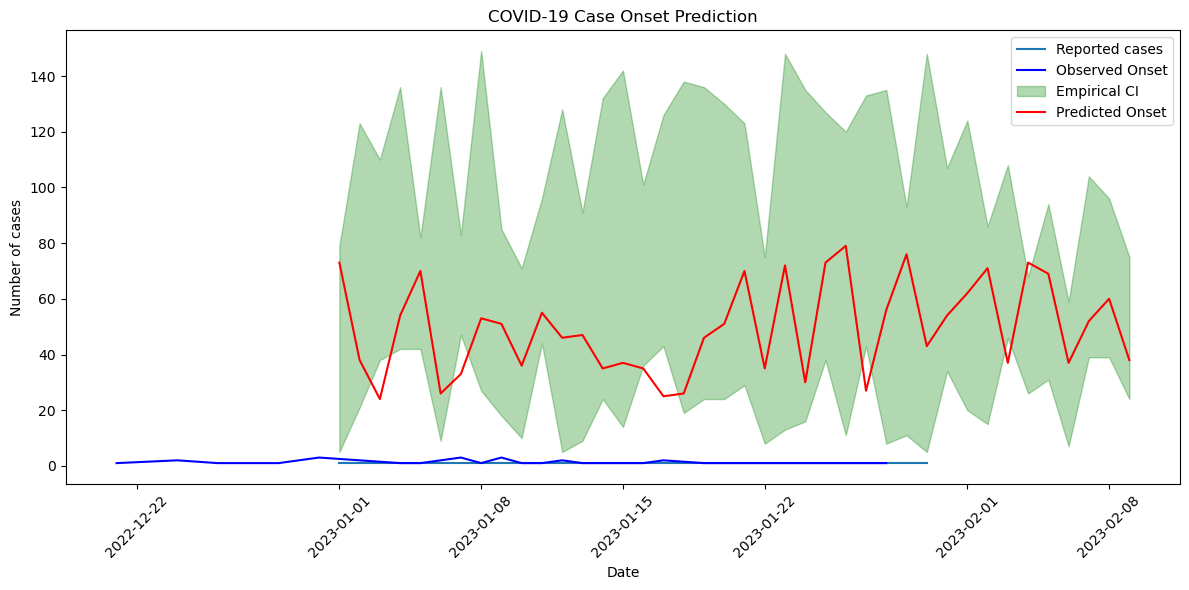

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Create synthetic linelist data
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(30)]
linelist = pd.DataFrame({
    'report_date': dates,
    'onset_date': [d - timedelta(days=np.random.randint(0, 14)) for d in dates],
    'delay_int': np.random.randint(0, 14, 30),
    'actual_report': range(30),
    'actual_onset': np.random.randint(0, 30, 30)
})

# Create synthetic predicted_onset data
pred_dates = pd.date_range(start=start_date, periods=40)
predicted_onset = pd.DataFrame({
    'pred_onset': pred_dates,
    'nx': np.random.randint(10, 100, 40),
    'lb': np.random.randint(5, 50, 40),
    'ex': np.random.randint(20, 80, 40),
    'ub': np.random.randint(50, 150, 40)
})

# Plotting
plt.figure(figsize=(12, 6))

# Plot reported cases
reported_cases = linelist.groupby('report_date').size()
plt.plot(reported_cases.index, reported_cases.values, label='Reported cases')

# Plot observed onset
observed_onset = linelist.groupby('onset_date').size()
plt.plot(observed_onset.index, observed_onset.values, label='Observed Onset', color='blue')

# Plot predicted onset with confidence interval
plt.fill_between(predicted_onset['pred_onset'], predicted_onset['lb'], predicted_onset['ub'], 
                 color='green', alpha=0.3, label='Empirical CI')
plt.plot(predicted_onset['pred_onset'], predicted_onset['ex'], color='red', label='Predicted Onset')

plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('COVID-19 Case Onset Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Case counts:
  report_date   location  cases onset_date  delay_int
0  2023-01-01  Location1     47 2022-12-25          7
1  2023-01-01  Location2     55 2022-12-25          7
2  2023-01-01  Location3     42 2022-12-25          7
3  2023-01-02  Location1     52 2022-12-26          7
4  2023-01-02  Location2     58 2022-12-26          7
Total rows: 180

Linelist:
  report_date onset_date  delay_int  value  id  start_dt  actual_onset  \
0  2023-01-01 2022-12-25          7      1   1         0             0   
1  2023-01-01 2022-12-25          7      1   2         0             0   
2  2023-01-01 2022-12-25          7      1   3         0             0   
3  2023-01-02 2022-12-26          7      1   4         1             1   
4  2023-01-02 2022-12-26          7      1   5         1             1   

   actual_report  week_int  is_weekend  
0              7         1           1  
1              7         1           1  
2              7         1           1  
3              8         1 

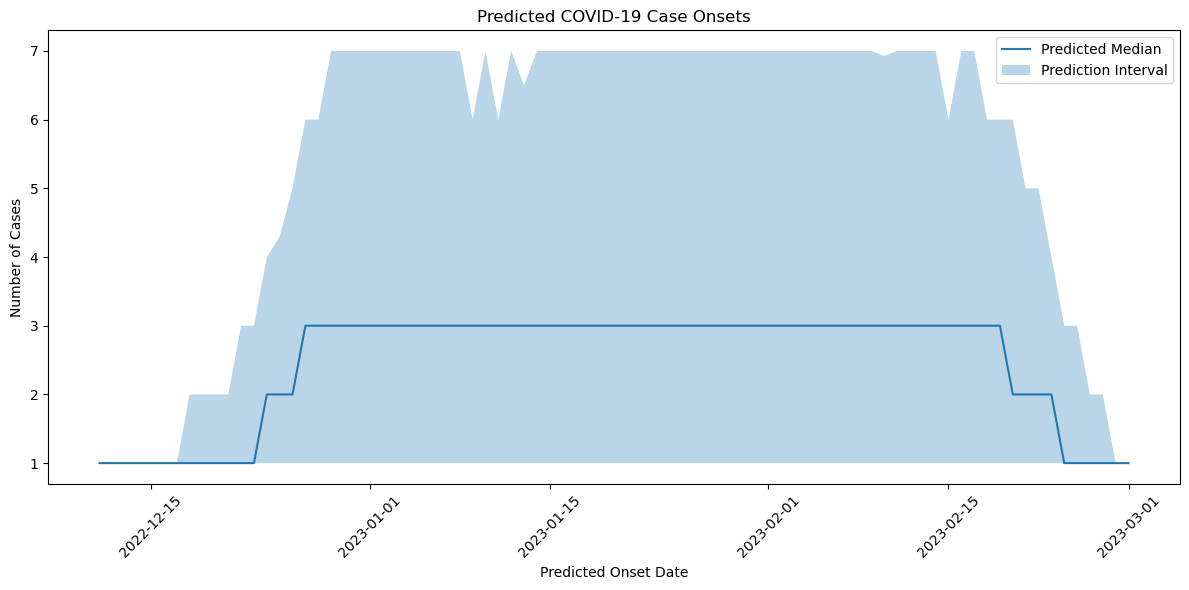

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from linelistSTAN import create_caseCounts, convert_to_linelist, run_model

# Function to create a larger synthetic dataset
def create_synthetic_data(start_date, num_days, avg_cases_per_day, locations):
    np.random.seed(42)  # for reproducibility
    dates = [start_date + timedelta(days=i) for i in range(num_days)]
    data = []
    for date in dates:
        for location in locations:
            cases = int(np.random.poisson(avg_cases_per_day))
            data.append({
                'date': date,
                'location': location,
                'cases': cases
            })
    return pd.DataFrame(data)

# Create a larger synthetic dataset
start_date = datetime(2023, 1, 1)
num_days = 60
avg_cases_per_day = 50
locations = ['Location1', 'Location2', 'Location3']

synthetic_data = create_synthetic_data(start_date, num_days, avg_cases_per_day, locations)

# Create case counts
case_counts = create_caseCounts(
    synthetic_data['date'],
    synthetic_data['location'],
    synthetic_data['cases']
)
print("Case counts:")
print(case_counts.head())
print(f"Total rows: {len(case_counts)}")

# Convert to linelist
linelist = convert_to_linelist(case_counts)
print("\nLinelist:")
print(linelist.head())
print(f"Total rows: {len(linelist)}")

# Run the model
n_weeks = 12
print("\nRunning model...")
predicted_onset = run_model(linelist, n_weeks)

# Print results
print("\nPredicted onset:")
print(predicted_onset)

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predicted_onset['pred_onset'], predicted_onset['ex'], label='Predicted Median')
plt.fill_between(predicted_onset['pred_onset'], predicted_onset['lb'], predicted_onset['ub'], alpha=0.3, label='Prediction Interval')
plt.xlabel('Predicted Onset Date')
plt.ylabel('Number of Cases')
plt.title('Predicted COVID-19 Case Onsets')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- We have our synthetic data seems to have been generated successfully, with 180 rows in both the case counts and linelist.
- Still seeing the warning "Optimization did not converge." This suggests that the model is having difficulty finding the optimal parameters, even with more data.
- The lower bound (lb) and median (ex) are consistently 1.0 for all dates, which is concerning.
- The upper bound (ub) shows some variation, ranging from 1.0 to 3.0, but this range is still very narrow given the large variation in 'nx'.

From the graph:

- The prediction interval (blue shaded area) shows more variation, which is good, but it's still narrower than we'd expect given the data.
- The shape of the prediction doesn't match what we'd typically expect for an epidemic curve (rise, peak, fall).

Case counts:
  report_date   location  cases onset_date  delay_int
0  2023-01-01  Location1     12 2022-12-25          2
1  2023-01-01  Location2      7 2022-12-25         11
2  2023-01-01  Location3      8 2022-12-25          6
3  2023-01-02  Location1      7 2022-12-26          9
4  2023-01-02  Location2      6 2022-12-26          2
Total rows: 270

Linelist:
  report_date onset_date  delay_int  value  id  start_dt  actual_onset  \
0  2023-01-01 2022-12-25          2      1   1         0             0   
1  2023-01-01 2022-12-25         11      1   2         0             0   
2  2023-01-01 2022-12-25          6      1   3         0             0   
3  2023-01-02 2022-12-26          9      1   4         1             1   
4  2023-01-02 2022-12-26          2      1   5         1             1   

   actual_report  week_int  is_weekend  log_delay  day_of_week  month  
0              2         1           1   1.098612            6      1  
1             11         1           1   2.4849

/opt/anaconda3/lib/python3.11/site-packages/pymc/distributions/timeseries.py:295: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, σ, τ, δ]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 202 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [Y_obs]


Output()


Predicted onset:
    pred_onset    nx   lb   ex   ub
0   2022-11-01     1  1.0  1.0  1.0
1   2022-11-06     1  1.0  1.0  1.0
2   2022-11-08     1  1.0  1.0  1.0
3   2022-11-15     1  1.0  1.0  1.0
4   2022-11-18     4  1.0  1.0  1.0
..         ...   ...  ...  ...  ...
132 2023-03-27  5285  1.0  1.0  4.0
133 2023-03-28  4476  1.0  1.0  3.0
134 2023-03-29  3365  1.0  1.0  3.0
135 2023-03-30  2142  1.0  1.0  2.0
136 2023-03-31   833  1.0  1.0  2.0

[137 rows x 5 columns]


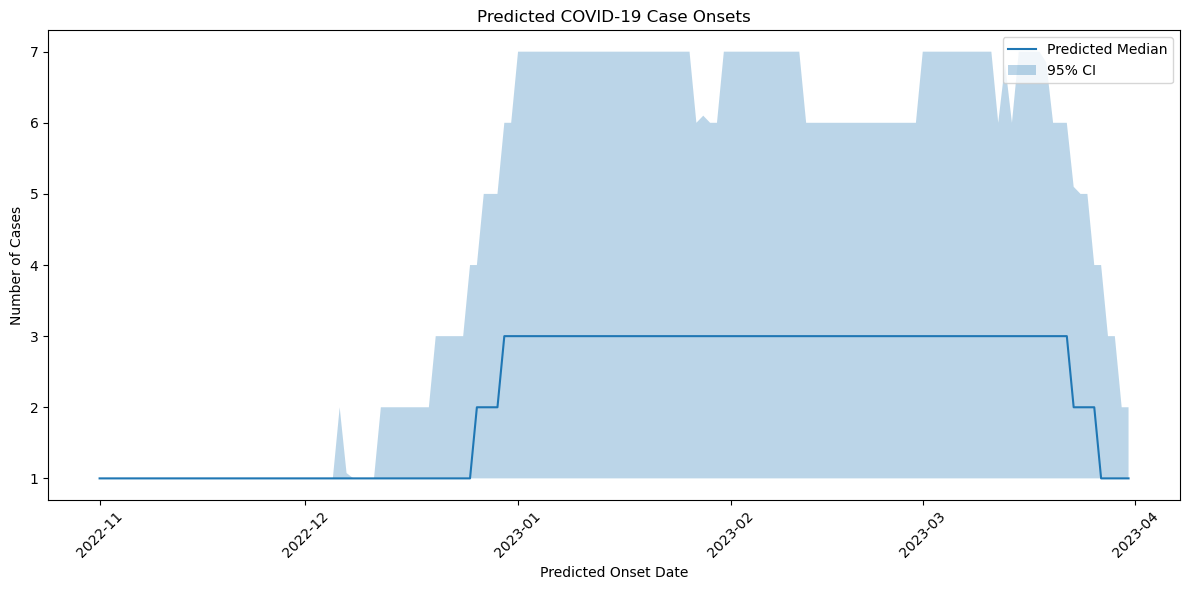

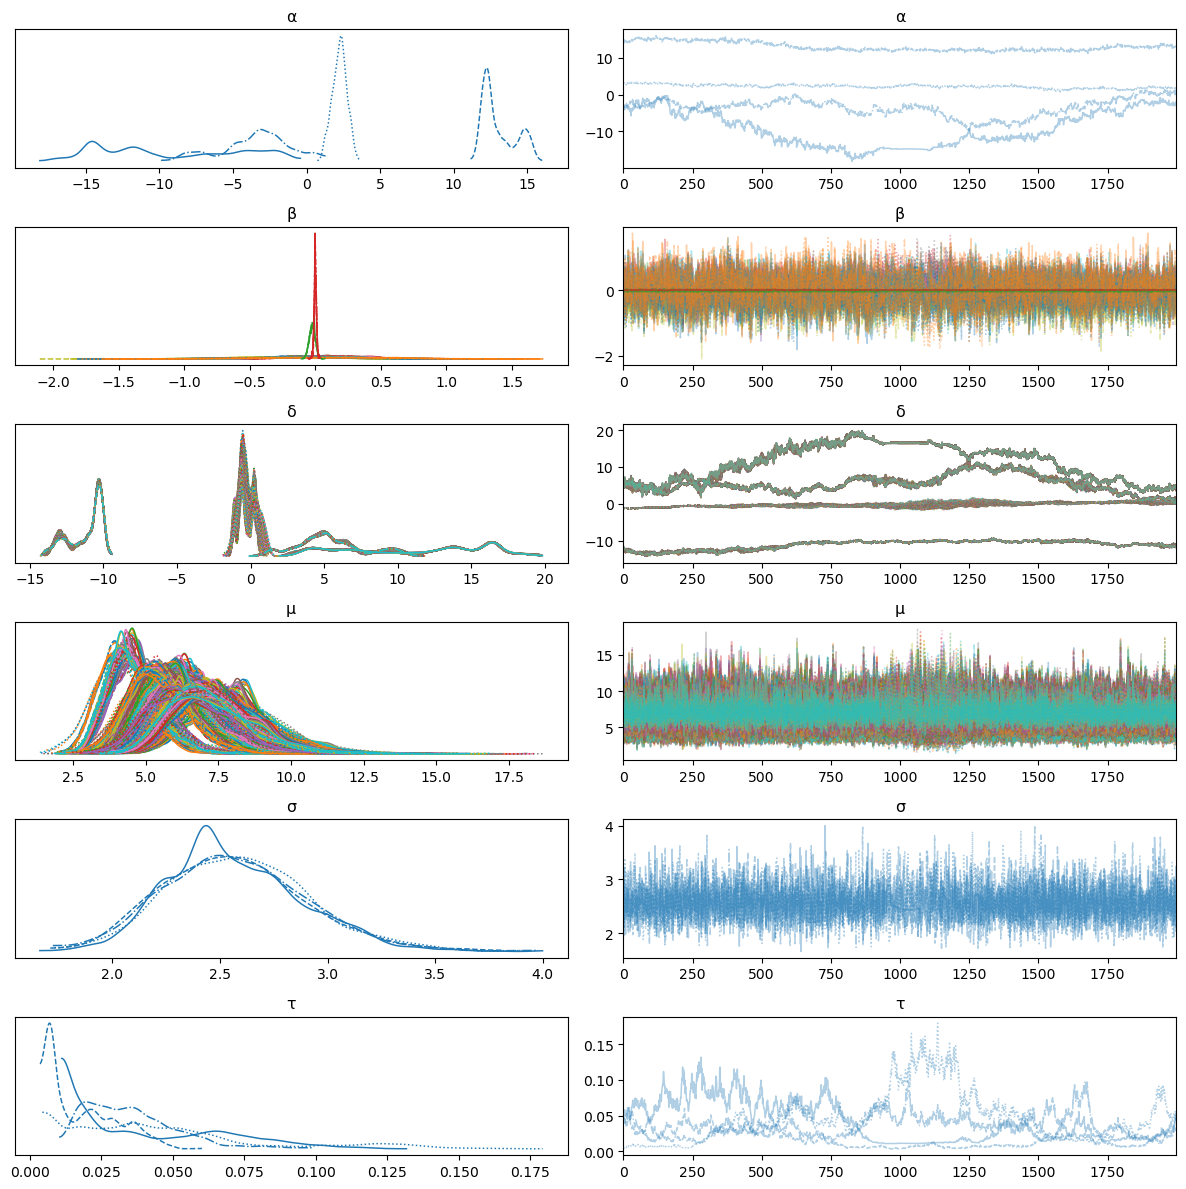

/opt/anaconda3/lib/python3.11/site-packages/arviz/plots/plot_utils.py:272: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (557) in plot_posterior, generating only 40 plots
  warnings.warn(


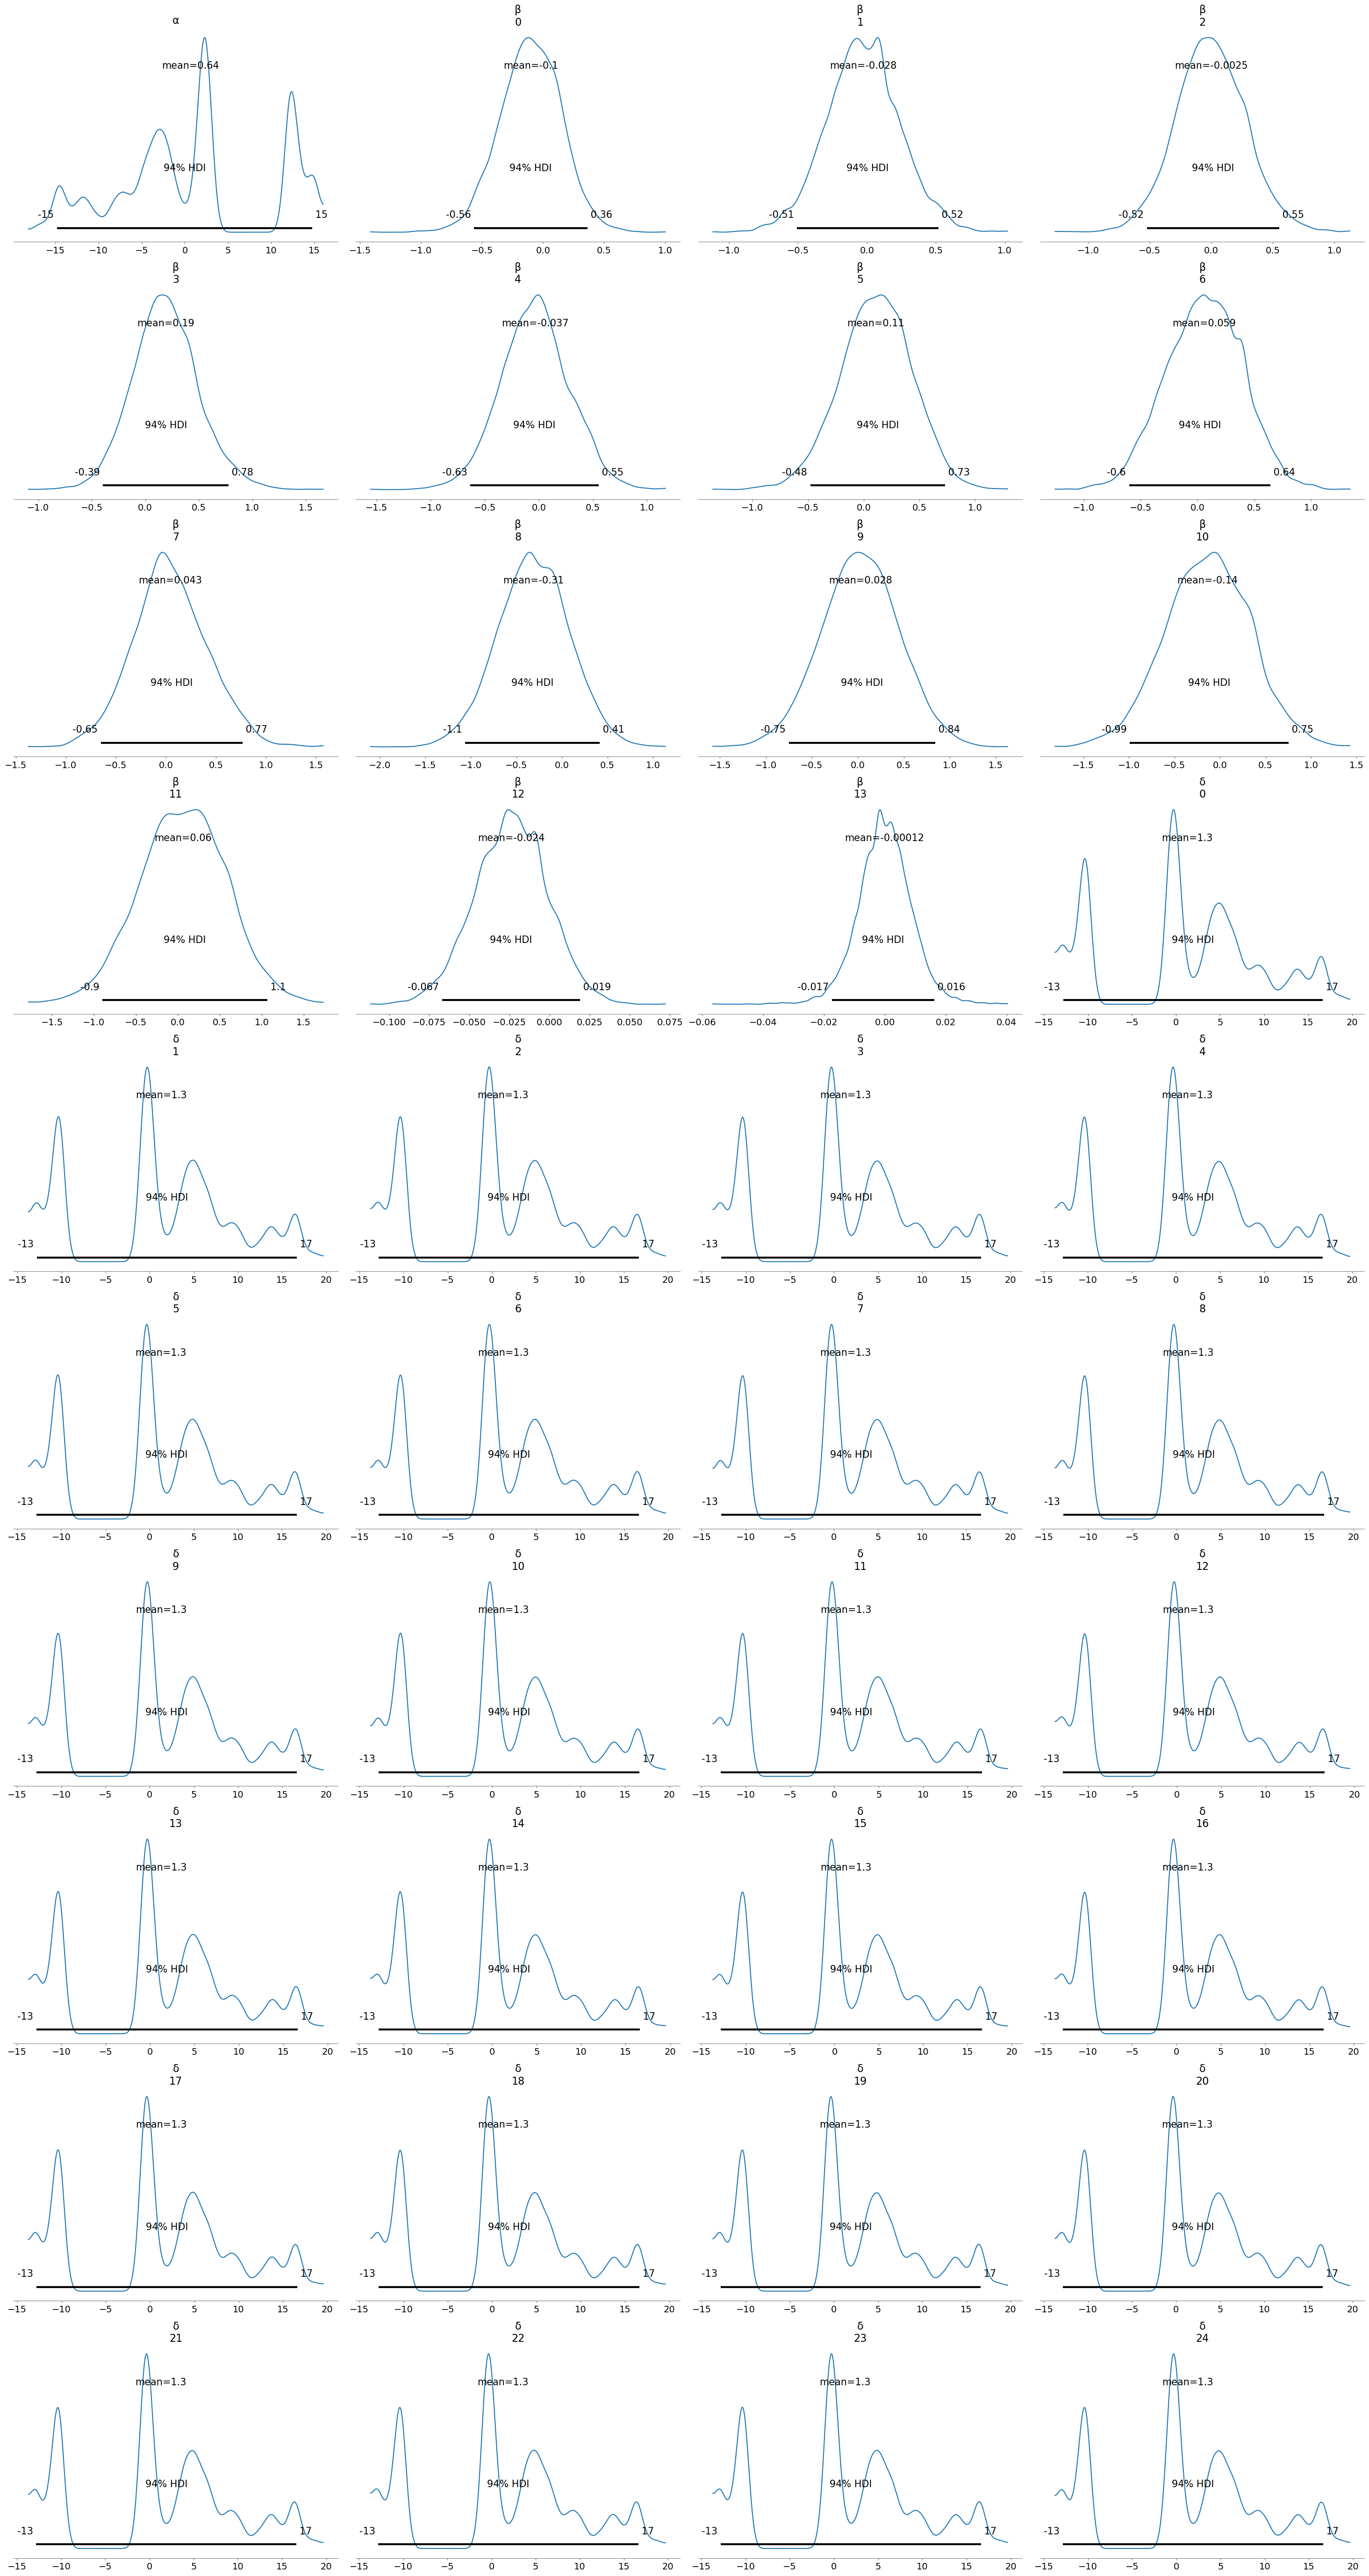


Model Summary:


NameError: name 'pm' is not defined

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from linelistSTAN import create_caseCounts, convert_to_linelist, run_model
from linelistSTAN.utils import plot_predictions, plot_trace, plot_posterior

# Function to create a larger synthetic dataset
def create_synthetic_data(start_date, num_days, avg_cases_per_day, locations):
    np.random.seed(42)  # for reproducibility
    dates = [start_date + timedelta(days=i) for i in range(num_days)]
    data = []
    for date in dates:
        for location in locations:
            cases = int(np.random.negative_binomial(n=10, p=0.5, size=1))  # Using negative binomial for more realistic data
            delay = np.random.randint(0, 14)  # Random delay between 0 and 14 days
            data.append({
                'date': date,
                'location': location,
                'cases': cases,
                'delay': delay
            })
    return pd.DataFrame(data)

# Create a larger synthetic dataset
start_date = datetime(2023, 1, 1)
num_days = 90  # Increased to 90 days for more data
avg_cases_per_day = 50
locations = ['Location1', 'Location2', 'Location3']

synthetic_data = create_synthetic_data(start_date, num_days, avg_cases_per_day, locations)

# Create case counts
case_counts = create_caseCounts(
    synthetic_data['date'],
    synthetic_data['location'],
    synthetic_data['cases']
)
case_counts['delay_int'] = synthetic_data['delay']  # Use the random delays we generated

print("Case counts:")
print(case_counts.head())
print(f"Total rows: {len(case_counts)}")

# Convert to linelist
linelist = convert_to_linelist(case_counts)
print("\nLinelist:")
print(linelist.head())
print(f"Total rows: {len(linelist)}")

# Run the model
n_weeks = 13  # Slightly more than 90 days
print("\nRunning model...")
predicted_onset, trace = run_model(linelist, n_weeks)

# Print results
print("\nPredicted onset:")
print(predicted_onset)

# Plot the results
plot_predictions(predicted_onset)
plot_trace(trace)
plot_posterior(trace)

# Additional analysis
print("\nModel Summary:")
print(pm.summary(trace).round(2))

# Plot the observed vs predicted delays
plt.figure(figsize=(10, 6))
plt.scatter(linelist['delay_int'], predicted_onset['ex'], alpha=0.5)
plt.xlabel('Observed Delay')
plt.ylabel('Predicted Delay (Median)')
plt.title('Observed vs Predicted Delays')
plt.plot([0, 14], [0, 14], 'r--')  # Diagonal line for reference
plt.show()

# Plot the trend of predicted onsets over time
plt.figure(figsize=(12, 6))
plt.plot(predicted_onset['pred_onset'], predicted_onset['ex'])
plt.fill_between(predicted_onset['pred_onset'], predicted_onset['lb'], predicted_onset['ub'], alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Predicted Number of Onsets')
plt.title('Trend of Predicted Onsets Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()